In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/Medical_insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [2]:
df.replace("?", np.nan, inplace=True)

In [3]:
missing_data = df.isnull()
missing_data.head()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [4]:
# Counting missing values in each columns
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

age
False    2772
Name: age, dtype: int64

sex
False    2772
Name: sex, dtype: int64

bmi
False    2772
Name: bmi, dtype: int64

children
False    2772
Name: children, dtype: int64

smoker
False    2772
Name: smoker, dtype: int64

region
False    2772
Name: region, dtype: int64

charges
False    2772
Name: charges, dtype: int64



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
# Converting smoker columns into numeric values
df['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)
df['sex'].replace(['female', 'male'], [0, 1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.788783
charges,0.298624,0.062837,0.199846,0.066442,0.788783,1.000000


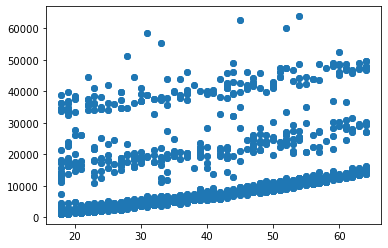

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.scatter(df['age'], df['charges'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

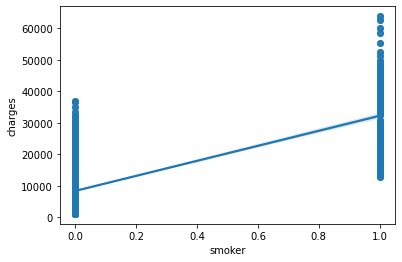

In [9]:
sns.regplot(x='smoker', y='charges', data=df)

### This section is about developing Linear Regression models 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_1 = df[['smoker']]
y = df['charges']

lr_model = LinearRegression()
lr_model.fit(X_1, y)

LinearRegression()

In [11]:
print(lr_model.score(X_1,y))

0.6221791718835359


In [12]:
X = df[["age", "sex", "bmi", "children", "smoker"]]
y = df['charges']


lr_model2 = LinearRegression()
lr_model2.fit(X, y)

print(lr_model2.score(X,y))

0.7495562325618463


In [13]:
# Evaluation of the coefs of our Linear Regression model
print(f"the cefficient are {lr_model2.coef_} while the intercept is {lr_model2.intercept_}")

the cefficient are [  256.6182493    -56.53583572   311.82059256   505.06135259
 23955.79834887] while the intercept is -11750.087206178854


In [15]:
# Evalutaion of performance of R_Square and Mean Square Value
R2_score = lr_model.score(X_1, y)

print(f"The R-Square score of the model is {R2_score} while the MSE between y_test and y_test pred is")

The R-Square score of the model is 0.6221791718835359 while the MSE between y_test and y_test pred is


We can see that our linear model ***performance is not great***. Now, let's use 
**Ridge Regression** to refine the performance of the models

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Constructing the Ridge model and fitting
myRidgeModel = Ridge(alpha=0.1)
myRidgeModel.fit(X_train, y_train)

Ridge(alpha=0.1)

In [17]:
# Predicting yhat on test data to compare
from sklearn.metrics import r2_score
yhat = myRidgeModel.predict(X_test)

print(r2_score(y_test, yhat))

0.6742443471871848


Now it is time to apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
 score for the testing subset.

In [18]:
pr = PolynomialFeatures(degree=2)

# Transforming X_train and X_test
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
myRidgeModel.fit(X_train_pr, y_train)
yhat_new = myRidgeModel.predict(X_test_pr)

In [20]:
print(r2_score(y_test,yhat_new))

0.7820419309142903
